In [28]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

In [22]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

In [23]:
np.random.seed(42)
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

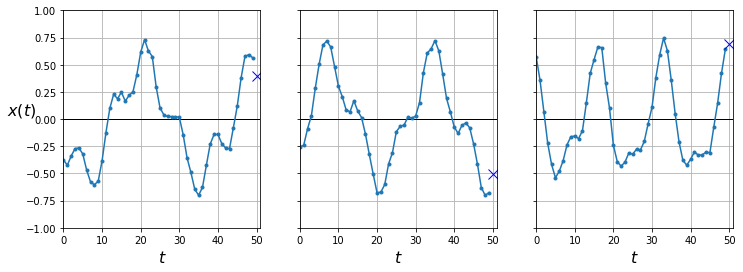

In [26]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None))
# save_fig("time_series_plot")
plt.show()


In [24]:
np.random.seed(42)
tf.set_random_seed(42)

# tensorflow.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

optimizer = keras.optimizers.Adam(lr=0.005)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 2s 356us/step - loss: 0.4110 - val_loss: 0.2144
Epoch 2/20
7000/7000 [==============================] - 2s 302us/step - loss: 0.1609 - val_loss: 0.1475
Epoch 3/20
7000/7000 [==============================] - 2s 305us/step - loss: 0.1448 - val_loss: 0.1459
Epoch 4/20
7000/7000 [==============================] - 2s 311us/step - loss: 0.1459 - val_loss: 0.1444
Epoch 5/20
7000/7000 [==============================] - 2s 311us/step - loss: 0.1472 - val_loss: 0.1577
Epoch 6/20
7000/7000 [==============================] - 2s 303us/step - loss: 0.1282 - val_loss: 0.0863
Epoch 7/20
7000/7000 [==============================] - 2s 303us/step - loss: 0.0576 - val_loss: 0.0445
Epoch 8/20
7000/7000 [==============================] - 2s 303us/step - loss: 0.0368 - val_loss: 0.0323
Epoch 9/20
7000/7000 [==============================] - 2s 302us/step - loss: 0.0285 - val_loss: 0.0260
Epoch 10/20
7000

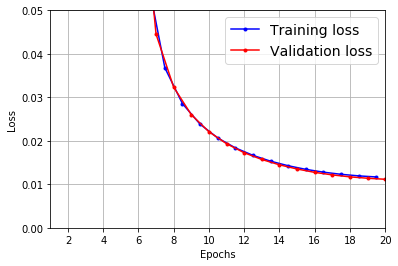

In [29]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [30]:

model.evaluate(X_valid, y_valid)

2000/2000 [==============================] - 0s 94us/step


0.011158282220363617

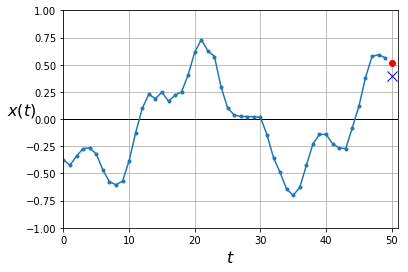

In [32]:

y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()


In [35]:
np.random.seed(42)
tf.set_random_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 6s 873us/step - loss: 0.0200 - val_loss: 0.0060
Epoch 2/20
7000/7000 [==============================] - 5s 782us/step - loss: 0.0049 - val_loss: 0.0062
Epoch 3/20
7000/7000 [==============================] - 5s 776us/step - loss: 0.0041 - val_loss: 0.0033
Epoch 4/20
7000/7000 [==============================] - 6s 844us/step - loss: 0.0036 - val_loss: 0.0038
Epoch 5/20
7000/7000 [==============================] - 5s 775us/step - loss: 0.0035 - val_loss: 0.0030
Epoch 6/20
7000/7000 [==============================] - 5s 773us/step - loss: 0.0034 - val_loss: 0.0030
Epoch 7/20
7000/7000 [==============================] - 5s 776us/step - loss: 0.0034 - val_loss: 0.0029
Epoch 8/20
7000/7000 [==============================] - 6s 823us/step - loss: 0.0032 - val_loss: 0.0036
Epoch 9/20
7000/7000 [==============================] - 5s 785us/step - loss: 0.0032 - val_loss: 0.0040
Epoch 10/20
7000

In [36]:
model.evaluate(X_valid, y_valid)

2000/2000 [==============================] - 0s 240us/step


0.002653405826538801

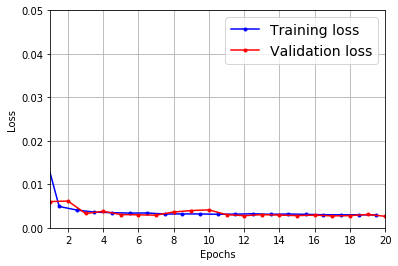

In [37]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

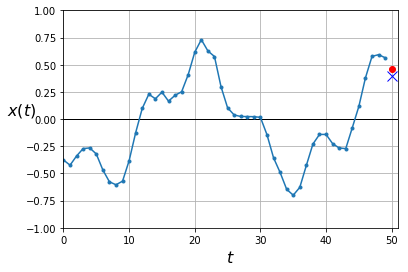

In [38]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [42]:
np.random.seed(42)
tf.set_random_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))


Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 5s 740us/step - loss: 0.0374 - val_loss: 0.0059
Epoch 2/20
7000/7000 [==============================] - 4s 547us/step - loss: 0.0050 - val_loss: 0.0044
Epoch 3/20
7000/7000 [==============================] - 4s 545us/step - loss: 0.0045 - val_loss: 0.0049
Epoch 4/20
7000/7000 [==============================] - 4s 545us/step - loss: 0.0044 - val_loss: 0.0037
Epoch 5/20
7000/7000 [==============================] - 4s 545us/step - loss: 0.0041 - val_loss: 0.0036
Epoch 6/20
7000/7000 [==============================] - 4s 544us/step - loss: 0.0040 - val_loss: 0.0036
Epoch 7/20
7000/7000 [==============================] - 4s 541us/step - loss: 0.0040 - val_loss: 0.0039
Epoch 8/20
7000/7000 [==============================] - 4s 548us/step - loss: 0.0039 - val_loss: 0.0034
Epoch 9/20
7000/7000 [==============================] - 4s 544us/step - loss: 0.0038 - val_loss: 0.0034
Epoch 10/20
7000

In [43]:
model.evaluate(X_valid, y_valid)

2000/2000 [==============================] - 0s 159us/step


0.003121237404644489

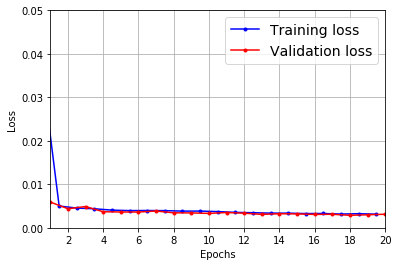

In [44]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

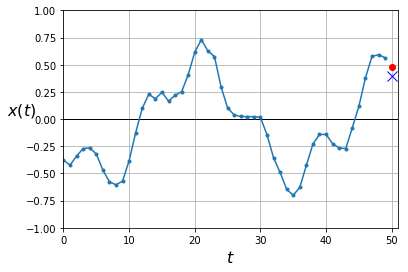

In [45]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

## Forecasting Several Steps Ahead

In [46]:
np.set_random_seed(43) # not 42, as it would give the first series in the train set

series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:]

AttributeError: module 'numpy' has no attribute 'set_random_seed'

In [ ]:
Y_pred.shape

In [ ]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "ro-")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "bx-", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])

plot_multiple_forecasts(X_new, Y_new, Y_pred)
save_fig("forecast_ahead_plot")
plt.show()


Now let's create an RNN that predicts all 10 next values at once:

In [48]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:]

In [49]:
np.random.seed(42)
tf.set_random_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(1)),
    keras.layers.Lambda(lambda Y_pred: Y_pred[:, -10:])
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 5s 647us/step - loss: 0.0545 - val_loss: 0.0318
Epoch 2/20
7000/7000 [==============================] - 4s 544us/step - loss: 0.0268 - val_loss: 0.0242
Epoch 3/20
7000/7000 [==============================] - 4s 548us/step - loss: 0.0223 - val_loss: 0.0219
Epoch 4/20
7000/7000 [==============================] - 4s 556us/step - loss: 0.0208 - val_loss: 0.0196
Epoch 5/20
7000/7000 [==============================] - 4s 582us/step - loss: 0.0201 - val_loss: 0.0208
Epoch 6/20
7000/7000 [==============================] - 4s 561us/step - loss: 0.0194 - val_loss: 0.0184
Epoch 7/20
7000/7000 [==============================] - 4s 545us/step - loss: 0.0192 - val_loss: 0.0187
Epoch 8/20
7000/7000 [==============================] - 4s 545us/step - loss: 0.0190 - val_loss: 0.0198
Epoch 9/20
7000/7000 [==============================] - 5s 666us/step - loss: 0.0186 - val_loss: 0.0192
Epoch 10/20
7000

In [50]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[:, -10:, :]

In [51]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

NameError: name 'plot_multiple_forecasts' is not defined